### Dataset
Link Dataset : https://www.kaggle.com/datasets/sumitm004/forest-fire-area

### Import Libraries

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam

### Load Dataset

In [192]:
raw_data = pd.read_csv('Dataset/forestfires.csv')

In [193]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [194]:
raw_data.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [195]:
print(raw_data['area'].value_counts())

area
0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: count, Length: 251, dtype: int64


In [196]:
raw_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [197]:
# Reducing the Right Skewness of the Area using log(n) + 1
raw_data['u_area'] = np.log(raw_data['area'] + 1)

In [198]:
# Reducing the skewness for the final training and dropping u_area
raw_data['area'] = np.log(raw_data['area'] + 1)
raw_data.drop(columns = 'u_area', inplace = True)

data = raw_data
display(data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [199]:
# Normalization of the features
minmax = MinMaxScaler()

# FFMC, DMC, DC, ISI, RH
data['FFMC'] = minmax.fit_transform(np.array(data['FFMC']).reshape(-1, 1))
data['DMC'] = minmax.fit_transform(np.array(data['DMC']).reshape(-1, 1))
data['DC'] = minmax.fit_transform(np.array(data['DC']).reshape(-1, 1))
data['ISI'] = minmax.fit_transform(np.array(data['ISI']).reshape(-1, 1))
data['RH'] = minmax.fit_transform(np.array(data['RH']).reshape(-1, 1))

In [200]:
data['day'].value_counts()

day
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: count, dtype: int64

In [201]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,0.928318,0.378264,0.633329,0.160814,18.889168,0.344567,4.017602,0.021663,1.111026
std,2.313778,1.229900,0.071227,0.220698,0.290918,0.081274,5.806625,0.191970,1.791653,0.295959,1.398436
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.200000,0.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,0.922581,0.232598,0.504046,0.115865,15.500000,0.211765,2.700000,0.000000,0.000000
50%,4.000000,4.000000,0.940645,0.369400,0.769673,0.149733,19.300000,0.317647,4.000000,0.000000,0.418710
75%,7.000000,5.000000,0.957419,0.486906,0.827958,0.192513,22.800000,0.447059,4.900000,0.000000,2.024193
max,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,33.300000,1.000000,9.400000,6.400000,6.995620


In [202]:
# Changing categorical values into numerical values

# Months
data['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
                           'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12},
                           inplace = True)

# Days
data['day'].replace({'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}, inplace = True)

data.head(10)

C:\Users\firea\AppData\Local\Temp\ipykernel_16812\1566562319.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
C:\Users\firea\AppData\Local\Temp\ipykernel_16812\1566562319.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,0.0
1,7,4,10,3,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,0.0
2,7,4,10,7,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,0.0
3,8,6,3,6,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,0.0
4,8,6,3,1,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,0.0
5,8,6,8,1,0.949677,0.290145,0.563035,0.262032,22.2,0.164706,5.4,0.0,0.0
6,8,6,8,2,0.949677,0.302550,0.571948,0.151515,24.1,0.141176,3.1,0.0,0.0
7,8,6,8,2,0.939355,0.497243,0.703999,0.190731,8.0,0.835294,2.2,0.0,0.0
8,8,6,9,3,0.932903,0.442453,0.802979,0.124777,13.1,0.564706,5.4,0.0,0.0
9,7,5,9,7,0.952258,0.299449,0.810015,0.126560,22.8,0.294118,4.0,0.0,0.0


In [203]:
data.shape

(517, 13)

### Splitting Data

In [204]:
from sklearn.model_selection import train_test_split

target = data['area']
features = data.drop(columns = 'area')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.15, random_state = 196)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (439, 12)
Test data set size :  (78, 12)


In [205]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
344,6,3,9,2,0.939355,0.444521,0.937258,0.133690,12.2,0.600000,4.9,0.0
6,8,6,8,2,0.949677,0.302550,0.571948,0.151515,24.1,0.141176,3.1,0.0
485,2,4,8,2,0.984516,0.463129,0.690043,0.379679,30.6,0.152941,3.6,0.0
419,2,5,8,1,0.940645,0.620951,0.709628,0.135472,24.8,0.247059,4.0,0.0
263,6,3,8,6,0.934194,0.482426,0.728509,0.126560,19.3,0.282353,3.6,0.0


In [206]:
# Standardize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Build Model

In [207]:
# Create the ANN model
model = Sequential()
model.add(Dense(20, input_dim=X_train_scaled.shape[1], activation='relu'))  # 1st layer
model.add(Dense(10, activation='relu'))  # 2nd layer
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust learning rate
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Fit the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=10, verbose=1)


Epoch 1/100


d:\firea\TUGAS ML\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1734 - val_loss: 2.0873
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9339 - val_loss: 2.0497
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9544 - val_loss: 1.9983
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7813 - val_loss: 1.9824
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0340 - val_loss: 1.9643
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9780 - val_loss: 1.9505
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9794 - val_loss: 1.9436
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9995 - val_loss: 1.9360
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7543 - val_loss: 1.9303
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0797 - val_loss: 1.9018
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8296 - val_loss: 1.9123
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0657 - val_lo

In [208]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,445 (5.65 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 964 (3.77 KB)

### Testing dan Evaluation

In [209]:
# Evaluate the model on test data
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Mean Squared Error on Test Set: 1.825542535518884


In [210]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

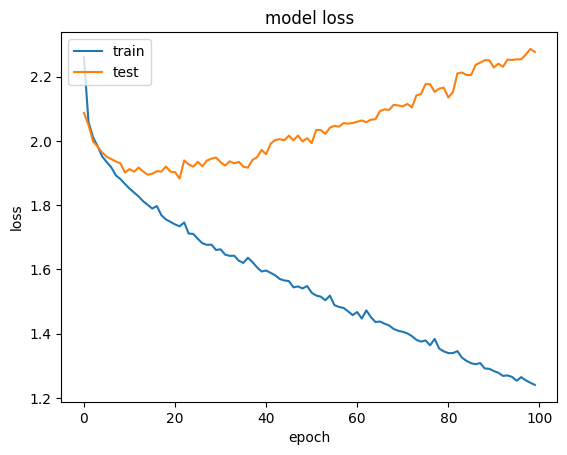

In [215]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()